In [6]:
# https://www.analyticsvidhya.com/blog/2016/07/practical-guide-data-preprocessing-python-scikit-learn/
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('fivethirtyeight')

In [174]:
X_train=pd.read_csv('data/X_train.csv')
Y_train=pd.read_csv('data/Y_train.csv')

X_test=pd.read_csv('data/X_test.csv')
Y_test=pd.read_csv('data/Y_test.csv')

In [5]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban


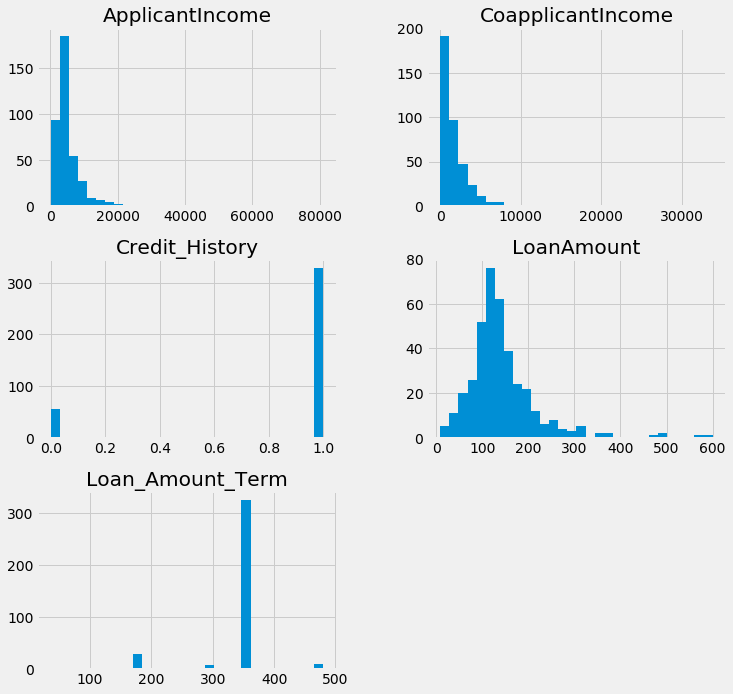

In [13]:
X_train.select_dtypes(include=['float64','int64']).hist(figsize=[11,11], bins=30);

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train.select_dtypes(include=['float64','int64']), Y_train)

/efs/orhancan/.pyenv/versions/myenv/lib/python3.4/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, knn.predict(X_test.select_dtypes(include=['float64','int64'])))

0.61458333333333337

In [19]:
Y_train['Target'].value_counts(normalize=True)

Y    0.705729
N    0.294271
Name: Target, dtype: float64

In [20]:
Y_test['Target'].value_counts(normalize=True)

Y    0.635417
N    0.364583
Name: Target, dtype: float64

## MinMax Scaler

In [21]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
X_train_minmax = min_max.fit_transform(X_train.select_dtypes(include=['float64','int64']))
X_test_minmax = min_max.fit_transform(X_test.select_dtypes(include=['float64','int64']))

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax, Y_train)

accuracy_score(Y_test, knn.predict(X_test_minmax))

/efs/orhancan/.pyenv/versions/myenv/lib/python3.4/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


0.75

In [31]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(penalty='l2',C=0.1)
log.fit(X_train.select_dtypes(include=['float64','int64']), Y_train)

accuracy_score(Y_test, log.predict(X_test.select_dtypes(include=['float64','int64'])))

/efs/orhancan/.pyenv/versions/myenv/lib/python3.4/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75

In [33]:
log = LogisticRegression(penalty='l2',C=0.1)
log.fit(X_train_minmax, Y_train)

accuracy_score(Y_test, log.predict(X_test_minmax))

/efs/orhancan/.pyenv/versions/myenv/lib/python3.4/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75

## Standardization

In [175]:
from sklearn.preprocessing import scale

X_train_scale = scale(X_train.select_dtypes(include=['float64','int64']))
X_test_scale = scale(X_test.select_dtypes(include=['float64','int64']))

from sklearn.linear_model import LogisticRegression

log = LogisticRegression(penalty='l2',C=0.1)
log.fit(X_train_scale, Y_train)

accuracy_score(Y_test, log.predict(X_test_scale))

/efs/orhancan/.pyenv/versions/myenv/lib/python3.4/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75

In [40]:
from sklearn import svm

model = svm.SVC(kernel='linear', C=1.0, gamma=1)
model.fit(X_train.select_dtypes(include=['float64','int64']), Y_train)

accuracy_score(Y_test, model.predict(X_test.select_dtypes(include=['float64','int64'])))

/efs/orhancan/.pyenv/versions/myenv/lib/python3.4/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.67708333333333337

In [43]:
model = svm.SVC(kernel='linear', C=1.0, gamma=1)
model.fit(X_train_scale, Y_train)

accuracy_score(Y_test, model.predict(X_test_scale))

/efs/orhancan/.pyenv/versions/myenv/lib/python3.4/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75

## Label Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for c in X_train.select_dtypes(include=['object']).columns:
    data = X_train[c].append(X_test[c])
    le.fit(data.values)
    X_train[c] = le.transform(X_train[c])
    X_test[c] = le.transform(X_test[c])

In [108]:
X_train_scale = scale(X_train)
X_test_scale = scale(X_test)

log = LogisticRegression(penalty='l2', C=.01)
log.fit(X_train_scale, Y_train)

accuracy_score(Y_test, log.predict(X_test_scale))

/efs/orhancan/.pyenv/versions/myenv/lib/python3.4/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75

In [98]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_scale, Y_train)

accuracy_score(Y_test, model.predict(X_test_scale))

/efs/orhancan/.pyenv/versions/myenv/lib/python3.4/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.75

## One-hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)

g = X_train['Gender'].append(X_test['Gender'])
enc.fit(g)

In [177]:
def one_hot_encode(train, test, cols=[]):
    df = train.append(test)
    l = len(train.index)
    if len(cols) == 0:
        cols = df.select_dtypes(include=['object']).columns
        
    for c in cols:
        temp = pd.get_dummies(df[c], prefix=c)
        train = pd.concat([train,temp[:l]], axis=1)
        test = pd.concat([test,temp[l:]], axis=1)
        del train[c]
        del test[c]
    return train,test    

In [178]:
train, test = one_hot_encode(X_train, X_test, ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area'])

In [194]:
X_train_scale = scale(train.select_dtypes(include=['float64','int64']))
X_test_scale = scale(test.select_dtypes(include=['float64','int64']))

In [195]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_scale, Y_train)

accuracy_score(Y_test, model.predict(X_test_scale))

/efs/orhancan/.pyenv/versions/myenv/lib/python3.4/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


0.69791666666666663

In [196]:
log = LogisticRegression(penalty='l2', C=.01)
log.fit(X_train_scale, Y_train)

accuracy_score(Y_test, log.predict(X_test_scale))

/efs/orhancan/.pyenv/versions/myenv/lib/python3.4/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75